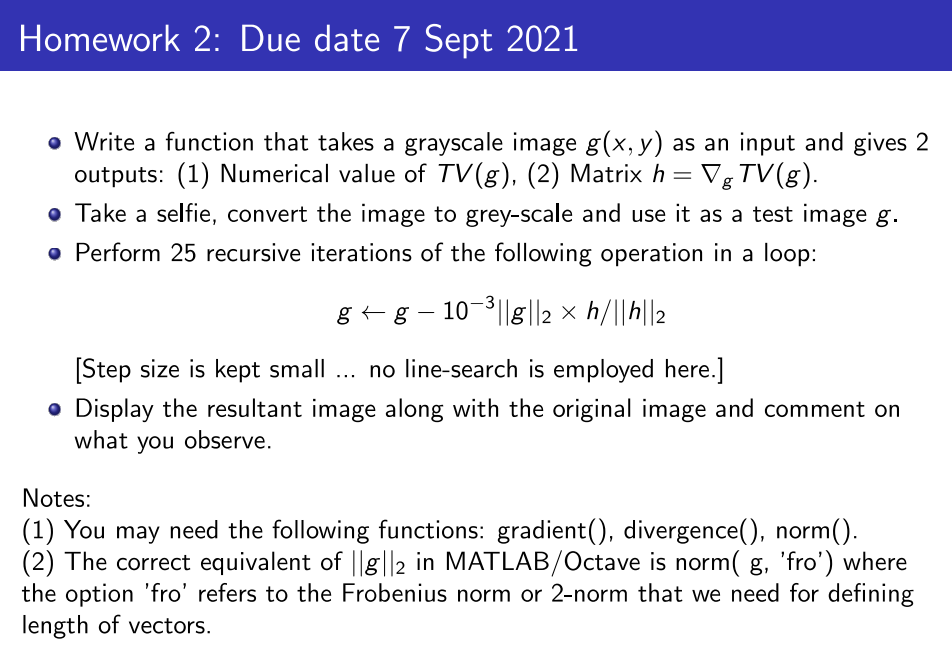

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from PIL import Image
import random

In [2]:
input = '37.jpeg'
img = Image.open(input)
img = img.convert('L')
img_arr = np.asarray(img)

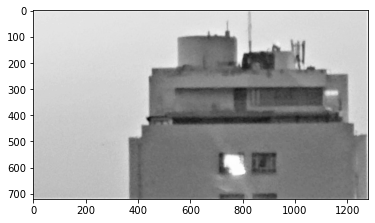

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(img_arr, cmap='gray')

In [4]:
# TV = np.sum(np.sqrt(g_x**2 + g_y**2))

In [5]:
# TV

In [6]:
def getTV_and_h(g, delta = 10e-08):
    gy, gx = np.gradient(g)
    temp = np.sqrt(gx**2 + gy**2 + delta**2)    
    h = -(np.gradient(gx/temp)[1] + np.gradient(gy/temp)[0])
    
    TV = np.sum(np.sqrt(gx**2 + gy**2))
    
    return TV, h

In [7]:
def optimization(img, it, tau):
    g=img
    for i in tqdm.tqdm(range(it)):
        TV, h = getTV_and_h(g)
#         print(TV)
        norm2_g = np.linalg.norm(g, ord = 'fro')
        norm2_h = np.linalg.norm(h, ord = 'fro')
        g = g - tau * norm2_g*(h/norm2_h)
    return g

In [8]:
img_arr_new = optimization(img_arr, 25, 1e-03)

100%|██████████████████████████████████████████████████████████████| 25/25 [00:04<00:00,  5.27it/s]


Text(0.5, 1.0, 'Iterated')

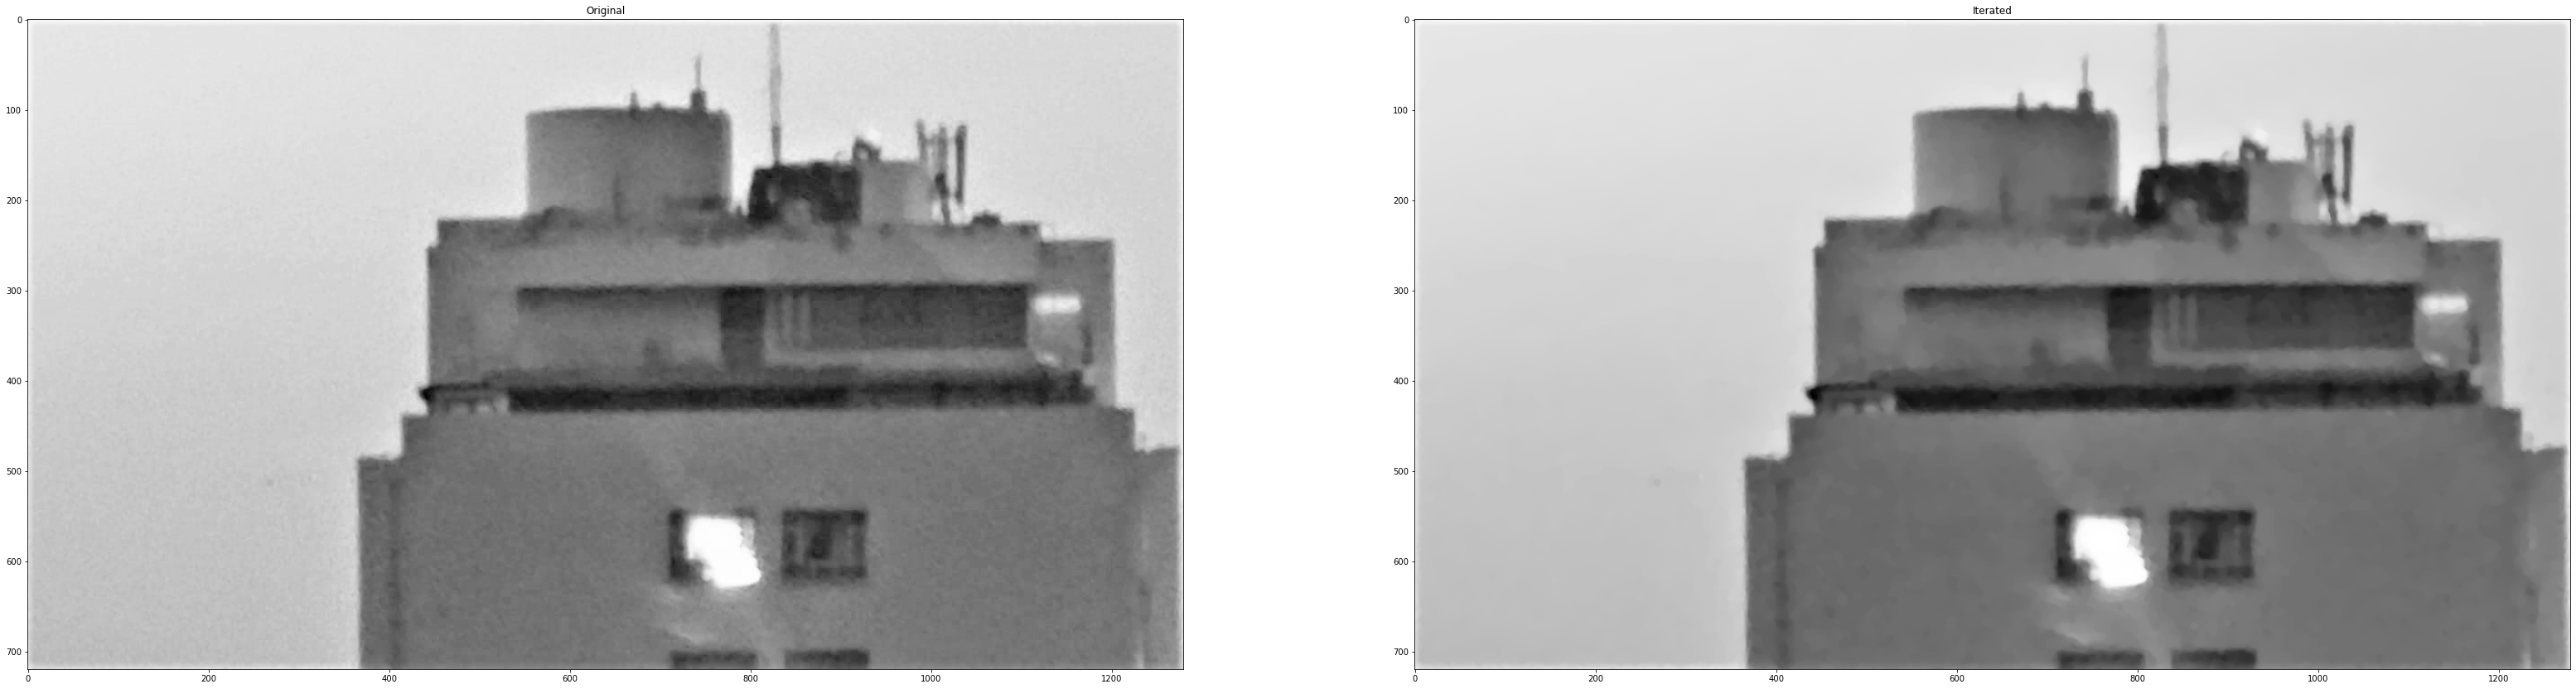

In [9]:
f, axarr = plt.subplots(1, 2, figsize= (55,200))
axarr[0].imshow(img_arr, cmap='gray')
axarr[0].set_title('Original')
axarr[1].imshow(img_arr_new, cmap='gray')
axarr[1].set_title('Iterated')

In [11]:
print(img_arr)

[[244 244 243 ... 244 245 245]
 [244 244 243 ... 244 245 245]
 [245 244 243 ... 245 245 245]
 ...
 [229 228 225 ... 200 209 215]
 [233 231 229 ... 200 209 215]
 [235 233 232 ... 200 209 214]]


In [12]:
print(img_arr_new)

[[242.12413782 242.91848287 242.36201831 ... 243.98777566 244.70929955
  244.62246144]
 [242.6125845  243.06218371 242.64253297 ... 243.19075773 243.59827982
  243.30457672]
 [242.43394862 242.96514894 242.59129933 ... 243.15251093 243.70094487
  243.06351506]
 ...
 [228.30212988 227.42296473 225.0620085  ... 199.8661074  208.97174816
  214.68819758]
 [232.0848182  230.63292906 228.73107403 ... 199.99778434 208.95873063
  214.47752641]
 [234.75730821 233.12423311 231.58924359 ... 200.00621738 208.89052566
  212.97765669]]
